# Exámen Diplomatura Ciencia de Datos 4º Bimestre

Este notebook contiene el desarrollo y entrenamiento del modelo predictivo a aplicar para el problema de negocio planteado.

## Datos del Grupo

Nombre y Apellido | LU

---

Carga de librerías de trabajo, exploración y preparación de los datos

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# df = pd.read_csv("/content/drive/MyDrive/DataScience/Final/db/budget_limpio.csv") #AUGUSTO
#df = pd.read_csv("/content/drive/MyDrive/DataScience/Ex4/budget_limpio.csv") #EZE
df = pd.read_csv("db/budget_limpio.csv")
df = df.drop('Unnamed: 0',axis=1)
df.sample(5)

,year,mes,pais,area,budget,real,saldo,es_extrabudget,gasto,budget_disponible,imputacion
3872,2021,5,España,1,195993,0,0,0,19,1,Opex
7913,2022,5,Francia,3,0,1569,0,0,3,0,Opex
514,2020,3,Republica Checa,2,416,0,0,0,4,1,Opex
9597,2022,10,Italia,2,118386,0,0,0,14,1,Capex
8366,2022,6,United Kingdom,1,0,876,0,0,16,0,Opex


In [4]:
df['real_saldo'] = df['real']+df['saldo']

In [5]:
df= df.drop(['real','saldo'],axis = 1)

In [ ]:
df.sample(5)

,year,mes,pais,area,budget,es_extrabudget,gasto,budget_disponible,imputacion,real_saldo
8599,2022,7,United Kingdom,1,7400,0,13,1,Opex,0
1970,2020,10,Polonia,2,0,0,19,0,Opex,4361
8064,2022,5,Italia,2,4000,0,13,1,Opex,0
91,2020,1,Alemania,2,5000,0,4,1,Opex,0
4946,2021,8,Italia,1,0,0,10,1,Capex,0


In [6]:
mask = df[(df['year'] == 2022) & (df['mes']>=10)].index
df.drop(mask,inplace=True)

In [ ]:
df.tail()

,year,mes,pais,area,budget,es_extrabudget,gasto,budget_disponible,imputacion,real_saldo
9392,2022,9,Alemania,3,0,0,6,0,Opex,2126
9393,2022,9,Italia,1,54388,0,3,1,Opex,0
9394,2022,9,Alemania,3,16200,0,2,1,Opex,0
9395,2022,9,Alemania,1,0,0,9,0,Opex,16069
9396,2022,9,Francia,2,0,0,3,0,Opex,2923


----

Creación de dummies para variables categóricas

In [7]:
dummies = pd.get_dummies(df)


In [ ]:
dummies

,year,mes,area,budget,es_extrabudget,gasto,budget_disponible,real_saldo,pais_Alemania,pais_Austria,pais_Eslovenia,pais_España,pais_Francia,pais_Italia,pais_Polonia,pais_Republica Checa,pais_Suiza,pais_United Kingdom,imputacion_Capex,imputacion_Opex
0,2020,1,2,1125,0,16,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2020,1,2,15000,0,11,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,2020,1,2,0,0,8,0,1761,0,0,0,0,0,0,1,0,0,0,1,0
3,2020,1,2,0,0,8,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4,2020,1,3,107500,0,19,1,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9392,2022,9,3,0,0,6,0,2126,1,0,0,0,0,0,0,0,0,0,0,1
9393,2022,9,1,54388,0,3,1,0,0,0,0,0,0,1,0,0,0,0,0,1
9394,2022,9,3,16200,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1
9395,2022,9,1,0,0,9,0,16069,1,0,0,0,0,0,0,0,0,0,0,1


Estudio de variables del dataset

<AxesSubplot:>

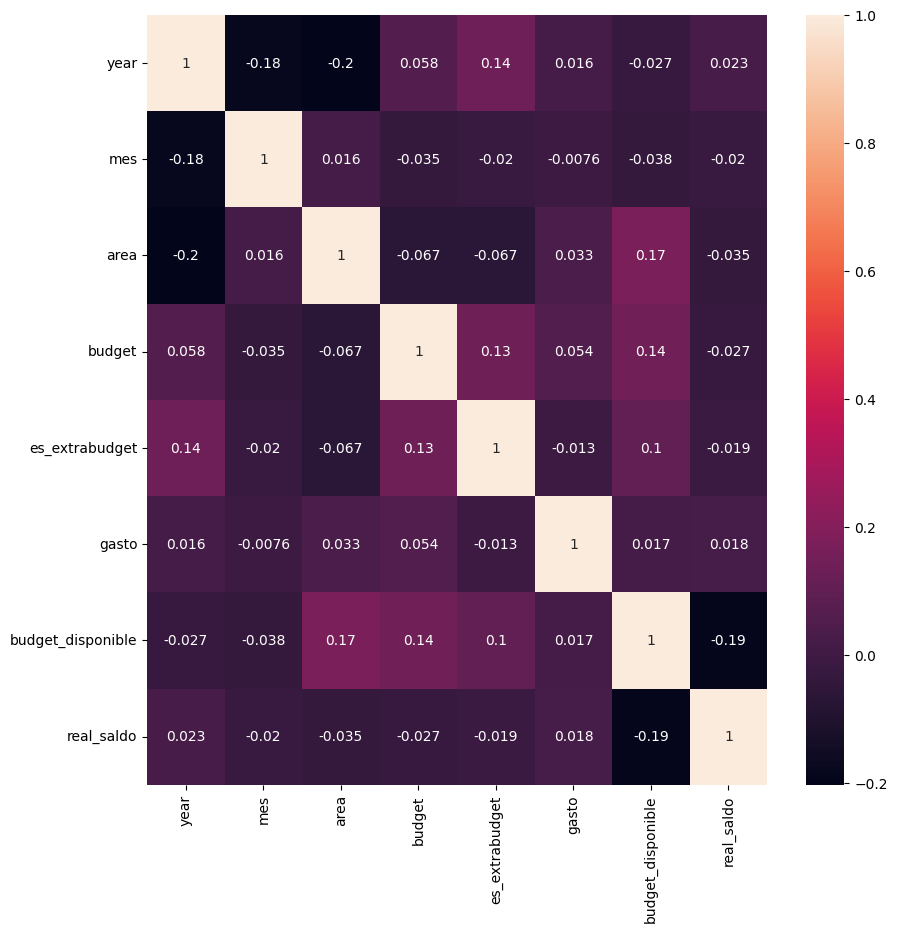

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

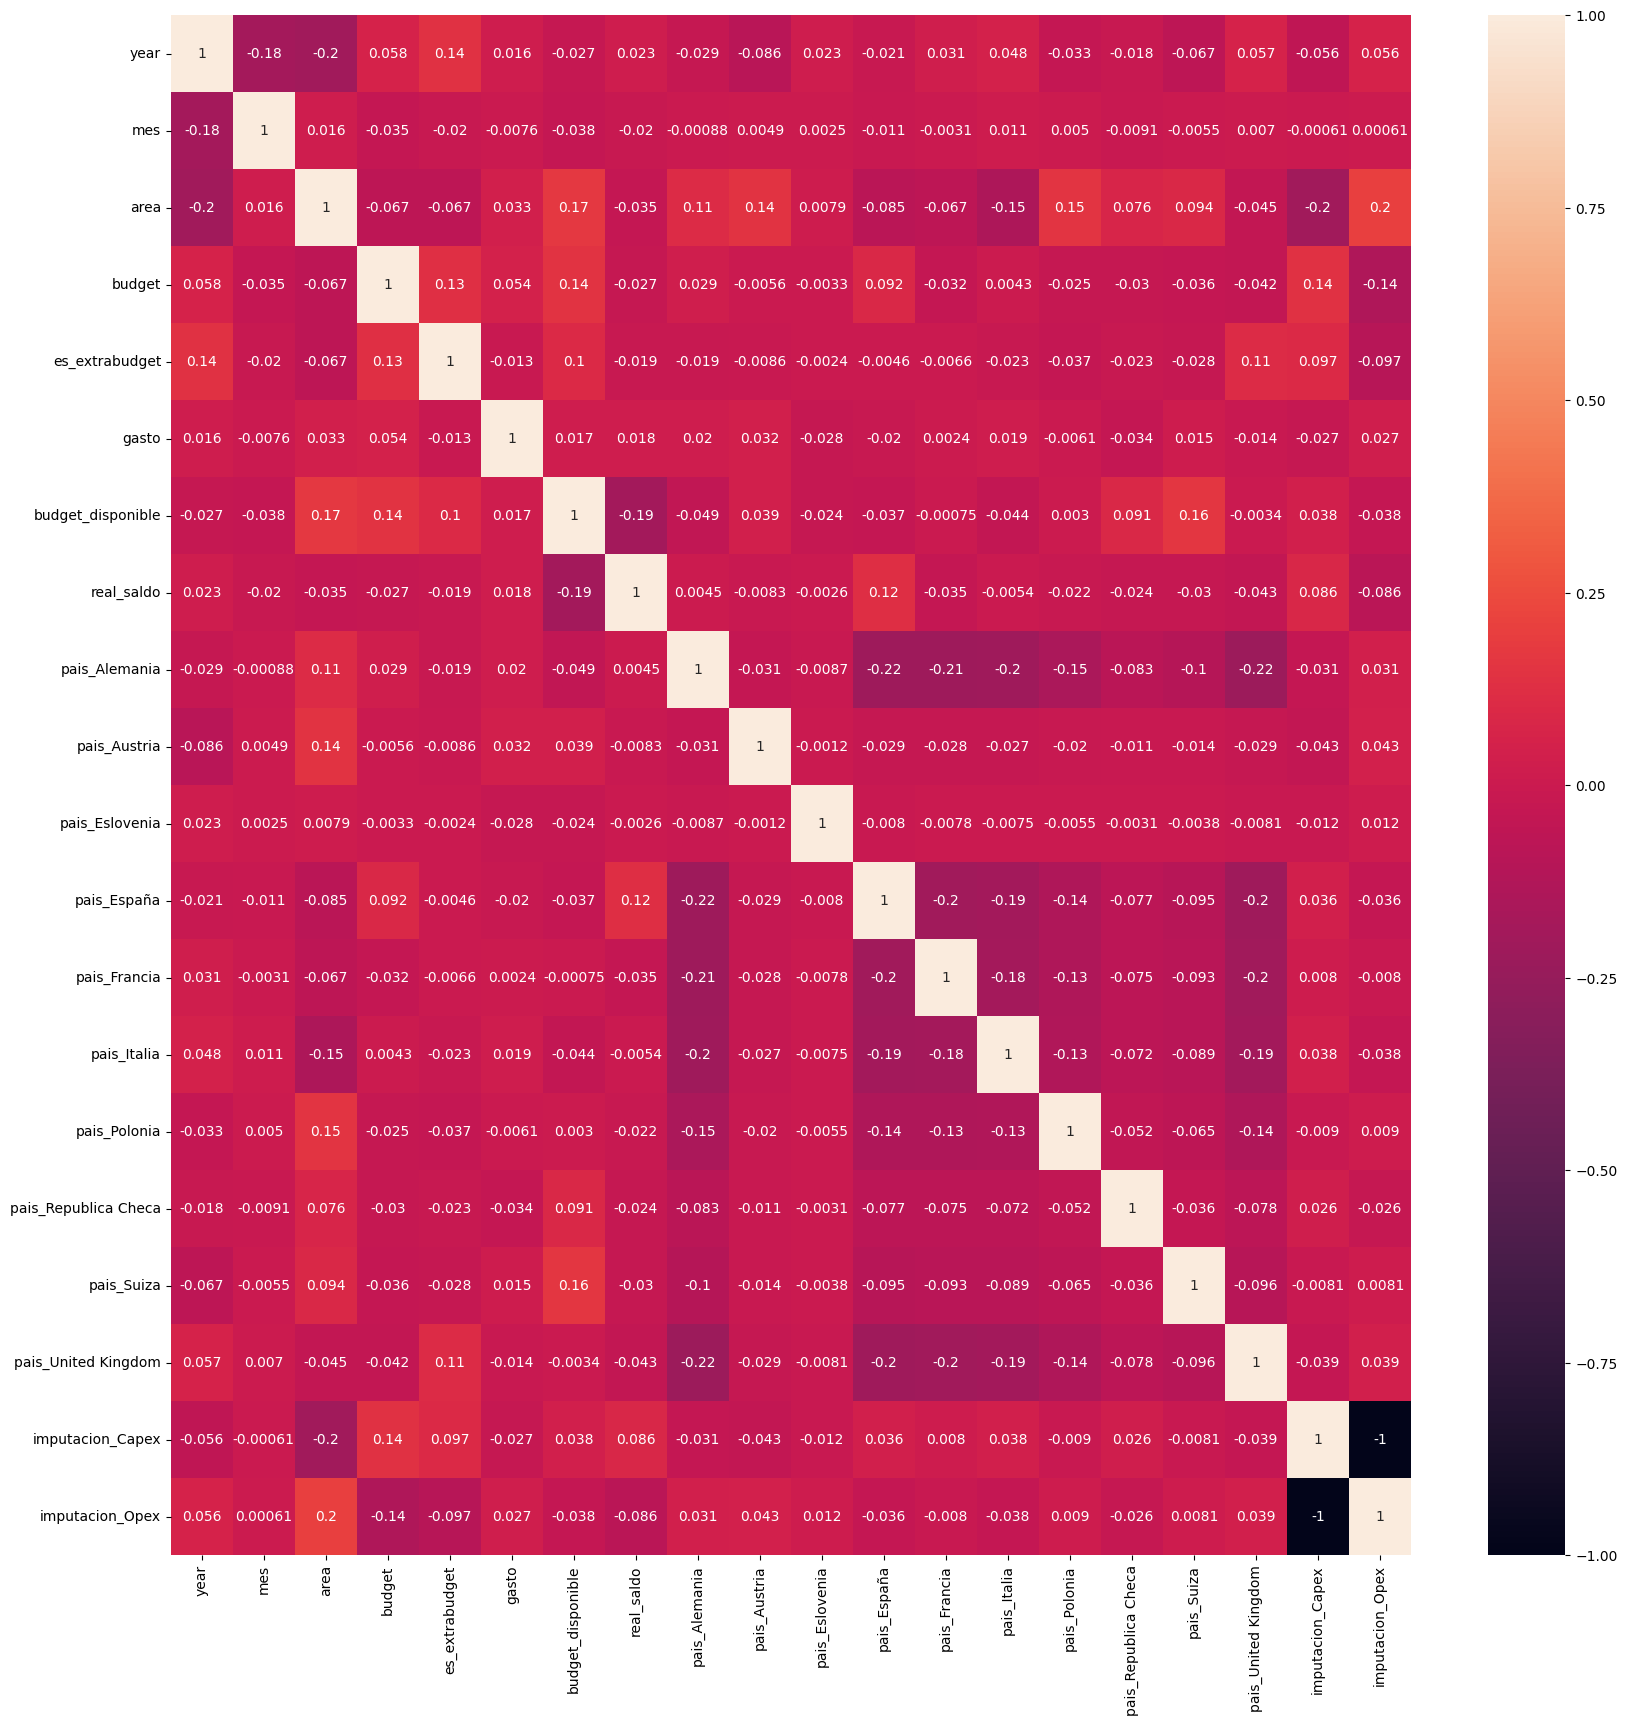

In [9]:
plt.figure(figsize = (20,20))
sns.heatmap(dummies.corr(),annot=True)

Descripción de las variables numericas

In [15]:
dummies["budget"].describe()

count    9.397000e+03
mean     2.955289e+04
std      1.592155e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.220000e+03
max      5.300000e+06
Name: budget, dtype: float64

In [ ]:
dummies["real_saldo"].describe()

count    9.397000e+03
mean     3.376127e+04
std      2.358490e+05
min     -3.681620e+05
25%      0.000000e+00
50%      0.000000e+00
75%      2.592000e+03
max      8.119547e+06
Name: real_saldo, dtype: float64

Habiendo explorado las variables, procedemos a dividir el dataset para definir la variable target.

In [16]:
X = dummies.drop('real_saldo',axis = 1)

y = dummies['real_saldo']


print(X.shape)
print(y.shape)

(9397, 19)
(9397,)


# Empieza la parte de predicción

Tenemos que inclinarnos por modelos SUPERVISADOS, puesto que trabajamos con datos etiquetados, y requerimos la predicción de un valor numérico. Por esto mismo, la predicción será basada en un modelo de Regresión, ya que intentamos predecir un número y no la clasificación de un dato en una categoría.


Arrancamos con una predicción básica:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
lr = LogisticRegression(n_jobs=-1, random_state=42).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.64
Test set score: 0.63


51 seg

De los modelos de regresión que probamos, el mas performante a priori resultó ser la regresión logística. Vamos a intentar mejorar su performance.


Habiendo tenido un pantallaso rápido sobre como performa el modelo, comenzamos con el estandarizado de variables y la selección de features, para observar como afectan al modelo.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
print("Score with normal features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_scaled, y_train)
print("Score with scaled features: {:.3f}".format(lr.score(X_test_scaled, y_test)))

Score with normal features: 0.628
Score with scaled features: 0.630


1m5seg

In [ ]:
#Feature selection
select = SelectPercentile(percentile=30)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)
# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

c:\Users\Eze\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Score with all features: 0.628
Score with only selected features: 0.628


1m6seg

Habiendo probado por separado, hacemos la prueba conjunta

In [ ]:
# Scaled and feature selection
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
select = SelectPercentile(percentile=30)
select.fit(X_train_scaled, y_train)
# transform training set
X_train_selected = select.transform(X_train_scaled)
# transform test data
X_test_selected = select.transform(X_test_scaled)

lr = LogisticRegression(n_jobs=-1, random_state=42)
lr.fit(X_train_scaled, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test_scaled, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only standarized selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

c:\Users\Eze\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Score with all features: 0.630
Score with only standarized selected features: 0.628


38seg

El ahorro de tiempo justifica la perdida de ACCURACY

CROSSVALIDATION

Para encontrar los mejores parametros, vamos a probar Gridsearch con CrossVal.

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(n_jobs=-1, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Train set score: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

c:\Users\Eze\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Train set score: 0.64
Test set score: 0.63
Best parameters: {'C': 0.001}
Best cross-validation score: 0.64
Best estimator:
LogisticRegression(C=0.001, n_jobs=-1, random_state=42)


18m15seg

El GridSearchCV nos dió los mejores parámetros, el modelo quedaría así: LogisticRegression(C=0.001, n_jobs=-1, random_state=42)

In [ ]:
lr= LogisticRegression(C=0.001,n_jobs=-1).fit(X_train,y_train)
print("Train set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Train set score: 0.63
Test set score: 0.65


Aqui corremos el Grid Search con estandarizacion y feature selection

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(n_jobs=-1, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)
print("Train set score: {:.2f}".format(grid_search.score(X_train_selected, y_train)))
print("Test set score: {:.2f}".format(grid_search.score(X_test_selected, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

c:\Users\Eze\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Train set score: 0.64
Test set score: 0.63
Best parameters: {'C': 0.001}
Best cross-validation score: 0.64
Best estimator:
LogisticRegression(C=0.001, n_jobs=-1, random_state=42)


4min41seg

Ya definido, vamos a pasar a entrenar el modelo con estandarizado de datos y la selección de features

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
select = SelectPercentile(percentile=30)
select.fit(X_train_scaled, y_train)
# transform training set
X_train_selected = select.transform(X_train_scaled)
# transform test data
X_test_selected = select.transform(X_test_scaled)

lr = LogisticRegression(C=0.001, n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
print("Score con parametros normales: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score con estandarizado y feature selection: {:.3f}".format(lr.score(X_test_selected, y_test)))

C:\Users\Xenot\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Score con parametros normales: 0.628
Score con estandarizado y feature selection: 0.628


1m1seg

Acá probamos el modelo, viendo como reacciona al mes 9

In [22]:
data = dummies[(dummies['year'] == 2022) & (dummies['mes']==9)].copy()
data.drop('real_saldo',axis=1,inplace=True)

target =  dummies[(dummies['year'] == 2022) & (dummies['mes']==9)].copy()
target =  target['real_saldo']

In [88]:
data.tail()

,year,mes,area,budget,es_extrabudget,gasto,budget_disponible,pais_Alemania,pais_Austria,pais_Eslovenia,pais_España,pais_Francia,pais_Italia,pais_Polonia,pais_Republica Checa,pais_Suiza,pais_United Kingdom,imputacion_Capex,imputacion_Opex
9392,2022,9,3,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,1
9393,2022,9,1,54388,0,3,1,0,0,0,0,0,1,0,0,0,0,0,1
9394,2022,9,3,16200,0,2,1,1,0,0,0,0,0,0,0,0,0,0,1
9395,2022,9,1,0,0,9,0,1,0,0,0,0,0,0,0,0,0,0,1
9396,2022,9,2,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,1


In [24]:
target

7785    522187
7786       107
7787     -2944
7788         0
7789      9441
         ...  
8094         0
8095         0
8096         0
8097    858699
8098      3138
Name: real_saldo, Length: 314, dtype: int64

In [25]:
Xp_scl = scaler.transform(data)
Xp = select.transform(Xp_scl)
# yp = select.transform(main_prueba['real_saldo'])

In [28]:
# Ahora probamos la predicción del modelo, para ver las diferencias

prediccion = lr.predict(Xp)
prediccion

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,


El modelo no predice correctamente ya que todas las devoluciones son 0, lamentablemente debemos descartar el modelo

Procedemos a usar herramientas de AutoML

## TPOT

In [ ]:
from tpot import TPOTRegressor

c:\Users\Eze\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
tpot = TPOTRegressor(max_time_mins=360, population_size=100, verbosity=2, random_state=42,n_jobs=-1,memory='auto', warm_start=True)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_modelo.py')

                                                                              
Generation 1 - Current best internal CV score: -34665915348.31555
                                                                              
Generation 2 - Current best internal CV score: -34665915348.31555
                                                                              
Generation 3 - Current best internal CV score: -34665915348.31555
                                                                              
Generation 4 - Current best internal CV score: -34665915348.31555
                                                                              
Generation 5 - Current best internal CV score: -34558867277.71433
                                                                              
Generation 6 - Current best internal CV score: -34170050056.65739
                                                                              
Generation 7 - Current best internal CV score: -337

c:\Users\Eze\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
c:\Users\Eze\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Mejor TPOT

In [ ]:
from tpot import TPOTRegressor

# tpot = TPOTRegressor(generations=5, scoring='roc_auc',population_size=50, verbosity=2, random_state=42, n_jobs = -2,memory='auto', warm_start=True)
# tpot.fit(X_train, y_train)
# print(tpot.score(X_test, y_test))
# tpot.export('tpot_Bank_Clean_pipeline.py')

tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('pipeline.py')

"""
c:\Users\Xenot\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
                                                                               
Generation 1 - Current best internal CV score: -35957525862.45198
                                                                              
Generation 2 - Current best internal CV score: -35906144353.22305
                                                                                
Generation 3 - Current best internal CV score: -34535377899.327675
                                                                                
Generation 4 - Current best internal CV score: -32023539589.21073
                                                                                
Generation 5 - Current best internal CV score: -32023539589.21073
                                                                              
Generation 6 - Current best internal CV score: -32008567362.80068
                                                                              
Generation 7 - Current best internal CV score: -30995688990.25649
                                                                                
Generation 8 - Current best internal CV score: -30995688990.25649
                                                                              
Generation 9 - Current best internal CV score: -30995688990.25649
                                                                              
Generation 10 - Current best internal CV score: -29748401555.157784
                                                                              
Best pipeline: RandomForestRegressor(KNeighborsRegressor(VarianceThreshold(ZeroCount(input_matrix), threshold=0.0001), n_neighbors=5, p=2, weights=distance), bootstrap=False, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=5, n_estimators=100)
C:\Users\Xenot\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(
-24516555345.110573
"""

Corremos el pipeline que generamos arriba

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator, ZeroCount
from tpot.export_utils import set_param_recursive
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, random_state=42)
pipeline = make_pipeline(
    ZeroCount(),
    VarianceThreshold(threshold=0.0001),
    StackingEstimator(estimator=KNeighborsRegressor(n_neighbors=5, p=2, weights="distance")),
    RandomForestRegressor(bootstrap=False, max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=5, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(pipeline.steps, 'random_state', 42)
pipeline.fit(X_train, y_train)
results = pipeline.predict(X_test)

In [81]:
print("Training set score: {:.2f}".format(pipeline.score(X_train, y_train)))
print("Test set score: {:.2f}".format(pipeline.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.13


Probamos el modelo para el mes 9 

In [43]:
data = dummies[(dummies['year'] == 2022) & (dummies['mes']==9)].copy()
data.drop('real_saldo',axis=1,inplace=True)

expected =  dummies[(dummies['year'] == 2022) & (dummies['mes']==9)].copy()
expected =  expected['real_saldo']

predicted = pipeline.predict(data)
predicted

array([  3864.68551525,      0.        ,  18279.53109712,      0.        ,
            0.        ,      0.        , 273872.73396818,      0.        ,
        28637.69956459,  21438.59975085,      0.        ,      0.        ,
        15993.57367788,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,  80621.08059954, 207861.77610462,
        41155.36338368,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,   3301.13899475,      0.        ,      0.        ,
         1655.2124764 ,      0.        ,      0.        ,   5087.88514495,
            0.        ,      0.        ,   1841.71747392,      0.        ,
         3274.24773406, 363364.04653498,  80023.73687885,      0.        ,
            0.        ,   1418.66470328,      0.        ,   4384.91534458,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("MAE",mean_absolute_error(expected,predicted))
print("MSE",mean_squared_error(expected,predicted))
print('R2',r2_score(expected,predicted))

MAE 9871.019242408462
MSE 2188320200.399186
R2 0.8231777674884636


Observamos que este modelo posee parametros aceptables para una primera etapa del proyecto

Vamos a hacer un grafico para representar el error medio absoluto

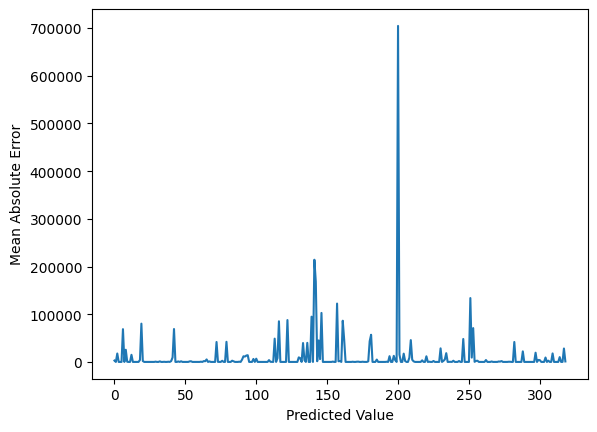

In [68]:
# example of increase in mean squared error
from matplotlib import pyplot
# from sklearn.metrics import mean_squared_error
# real value
expected = expected.reset_index(drop=True)

errors = list()
for i in range(len(expected)):
    
    err = abs(expected[i] - predicted[i]).mean()
 # store error
    errors.append(err)
 # report error
    # print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
# pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()

Este grafico representa el valor medio absoluto para cada sector predecido para poder tomar una decision sobre la prediccion del modelo